# MIDTERM CS370 

## PROBLEM SET 1: BAYESIAN LEARNING AND INFERENCE (TAKE HOME PROBLEM)

### PS1.1: Learning the bent coin experiment (15 points)

Consider a bent coin that has a probability of 0.7 of landing heads and a probability of 0.3 of landing tails. The coin is flipped m times. The sequence of heads and tails is recorded / observed and a hypothetical receiver needs to estimate the probability of heads from the experimental data.


####  PS1.1-1 (2.5 points)

What is the entropy in bits of the bent coin? Explain why its < 1 bits. 



H(X) = −∑ P(xi)log2(P(xi))
H(X) = -(P(H)log2(P(H)) + P(T)log2(P(T)))
P(H) = 0.7 P(T) = 0.3
H(X) = -(0.7(log2(0.7)) + 0.3(log2(0.3)))
​H(X) = -(-0.36022 + -0.5211)
H(X) = 0.881

The entropy of the bent coin is 0.881 bits. The reason why the entropy of the bent  coin is below 1 is because of the fact that entropy is measuring the uncertainty of a random variable's outcome. A perfect coin would have a 50% probability of being heads or tails, making it have an entropy of exactly 1 bit. But since our coin has a 70% chance of landing heads and a 30% chance of landing tails, the outcome is more predictable. This means the entropy for each coin flip will be less than 1.

#### PS1.1-2 (2.5 points)

Plot the entropy of the sequence of heads and tails as m increases for m=1 to m=500 in steps of 50?

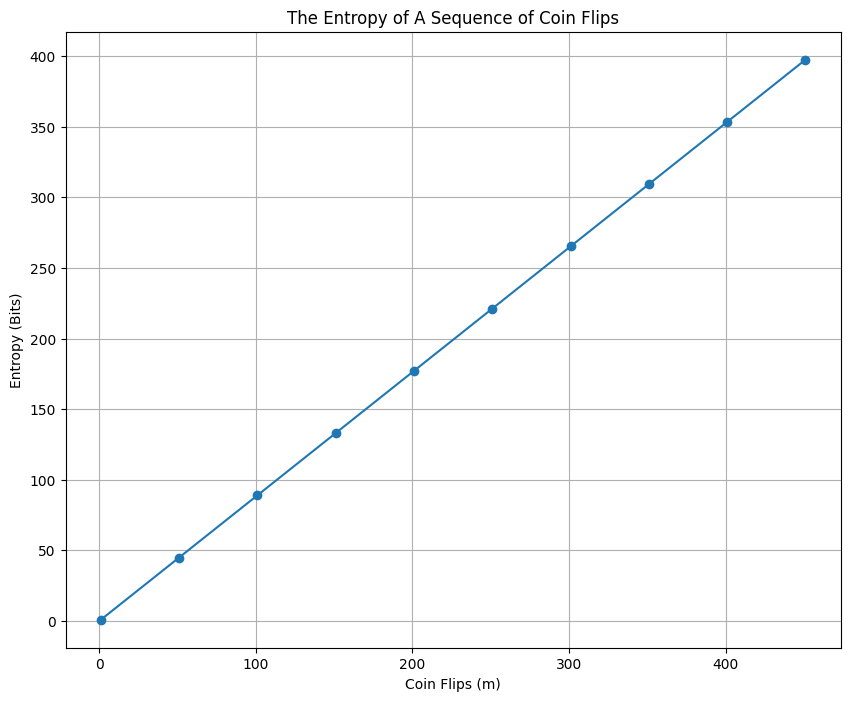

In [9]:
import math
import matplotlib.pyplot as plot

global PH
global PT

#Chance of heads or tails
PH = 0.3
PT = 0.7

m = []
totalEntropy = []

#m goes from 1 to 500 with steps of 50
for i in range(1, 501, 50):
    m.append(i)

def calcEntropy(Ph, Pt):
    #entropy equation from before
    entropy = -((Ph * math.log2(Ph)) + (Pt * math.log2(Pt)))
    return entropy

firstFlip = calcEntropy(PH, PT)

for i in m: 
    e = i * firstFlip
    totalEntropy.append(e)

plot.figure(figsize = (10, 8))
plot.plot(m, totalEntropy, marker = 'o')
plot.xlabel("Coin Flips (m)")
plot.ylabel("Entropy (Bits)")
plot.title("The Entropy of A Sequence of Coin Flips")
plot.grid(True)
plot.show()



#### PS1.1-3 (10 points)

The receiver is given the sequence of heads and tails and must use the Bayes rule to estimate the probability of heads. As a parenthesis, if we know this parameter then we we can infer / predict the next binary event but this is not the focus here. 

The prior probability distribution is assumed to be beta and to solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.5) titled "Bayesian Parameter Learning". You are asked to estimate and plot the **mean of the posterior probability distribution** of the probability of heads as a function of the probability of heads given the sequence of heads and tails where m=[0,1, 2, 3, 4, 5, 10, 20, 50, 100]. 

You can use the scipy.stats library to help you out. To get full points you need to document extensively your code and explain the results. Note that you have to produce except from the 10 plots, a table with the mean and variance where the columns will be $m$, mean, var.



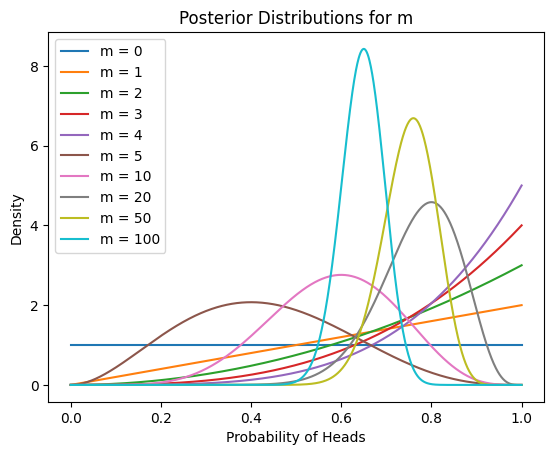

Table with the Mean and Variance

    m    |   Mean   | Variance 
_________|__________|__________
   0     | 0.500000 | 0.083333 
   1     | 0.666667 | 0.055556 
   2     | 0.750000 | 0.037500 
   3     | 0.800000 | 0.026667 
   4     | 0.833333 | 0.019841 
   5     | 0.428571 | 0.030612 
   10    | 0.583333 | 0.018697 
   20    | 0.772727 | 0.007636 
   50    | 0.750000 | 0.003538 
   100   | 0.647059 | 0.002217 


In [22]:
import numpy as np
import matplotlib.pyplot as plot
#for beta distribution like the problem says
from scipy.stats import beta

global PH

#Probabilty for heads
PH = 0.7

#prior distributions for alpha and beta 
#alpha = successes, beta = failures but in our case a represnts heads and b represtns tails
aPrior = 1
bPrior = 1

meanAndVariance = []

#Sequence of m values given from the problem
m = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100]

for i in m:
    #The if statement make sure there is a coin to flip
    if i > 0:
        #i flips of the bent coin simulated
        flips = np.random.binomial(n = 1, p = PH, size = i)
    
        #calculating the number of heads and tails that occured
    
        #Each flip results in an binary outcome of 1(heads) or 
        #0(tails)
        #So to count heads you just need to take sum of flips which
        #represents the outcomes of each flip, to get the total 
        #amount of heads that occured
        h = np.sum(flips)    
    else:
        h = 0
    #Since heads is calculated from the sum of flips(which 
    #represents the total amount of heads that occured because 
    #a 1 means an individual flip was heads) and i represents 
    #the number of flips total, you can just subtract the total 
    #amount of heads(h) from the total number of flips(i).
    #This also ensures that h + t = i which makes sense because
    #a coin flip is a binary outcome.
    t = i - h

    #Updating the hyperparameters will allow for a more accurate
    #distribution
    aPost = aPrior + h
    bPost = bPrior + t

    #To plot the distribution
    #Create an array for the xAxis of evenly space points that are between 0 and 1
    #The points represent the probabilities of heads
    xAxis = np.linspace(0, 1, 1000)
    #Calculate the probability density function of the beta distribution at each point on xAxis
    yAxis = beta.pdf(xAxis, aPost, bPost)
    #Plot the probability density function and add a label to make it easier to read
    plot.plot(xAxis, yAxis, label = f'm = {i}')
   
    #To make the table for the problem
    #The mean of beta distribution is equal to alpha / (alpha + beta)
    #It represents the probability of getting heads
    mean = aPost / (aPost + bPost)
    #Variance of beta distribution is equal to (alpha)(beta) / (alpha + beta)^2(alpha + beta + 1)
    #It measures the spread of the distribution. As the number of observations
    #increases the variance decreases which means a higher confidence in the probability
    var = (aPost * bPost) / (((aPost + bPost) ** 2) * (aPost + bPost + 1))   
    meanAndVariance.append((i, mean, var))

plot.xlabel("Probability of Heads")
plot.ylabel("Density")
plot.title("Posterior Distributions for m")
plot.legend()
plot.show()

print("Table with the Mean and Variance\n")
print("    m    |   Mean   | Variance ")
print("_________|__________|__________")
for i in meanAndVariance:
    print(f"   {i[0]:<4}  | {i[1]:<9.6f}| {i[2]:<9.6f}")








### PS1.2 Bayesian Linear Regression (15 points)

#### PS1.2-1 Dataset (2.5 points)

Generate a dataset of $m$ data points identical to the example of Figure 4.1 in GERON but modify the code such that you can produce results for the very small (eg 3 data points), low $m$ (eg 10 data points) and larger $m$ (eg 100 data points) cases. 

In [23]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

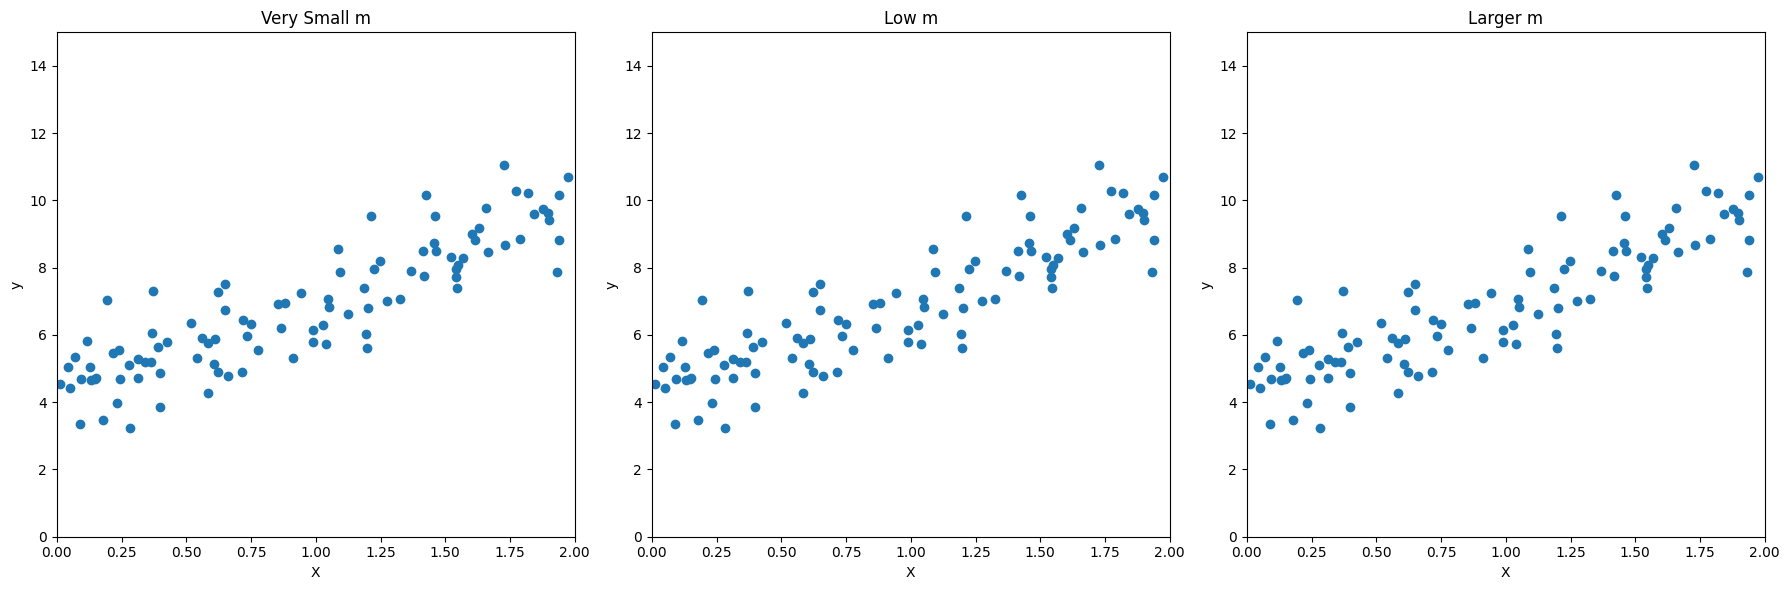

In [33]:
import numpy as np
import matplotlib.pyplot as plot

#Added noise to the generator like GERON to simulate more realistically
def genDataset(m):
    noise = 1.0
    np.random.seed(42)
    m = 100
    X = 2 * np.random.rand(m, 1)
    y = 4 + 3 * X + np.random.randn(m, 1) * noise
    #makes y a 1D array for plotting
    return X, y.ravel()

datasets = {
    #very small m (eg 3 data points)
    "Very Small m": genDataset(3), 
    #Low m (eg 10 data points)
    "Low m": genDataset(10), 
    #Larger m (eg 100 datapoints)
    "Larger m": genDataset(100)  
}

plot.figure(figsize = (18, 6))
#Loop through each of the datasets(very small, low, larger)
for i, (title, (X, y)) in enumerate(datasets.items(), 1):
    #This makes a subplot for each iteration of the loop, that is 1 by 3.
    #This allows for each dataset to be plotted on its own section.
    plot.subplot(1, 3, i)
    plot.scatter(X, y)
    plot.xlabel("X")
    plot.ylabel("y")
    plot.title(title)
    #Makes sure that all the subplots have the same scaling
    plot.axis([0, 2, 0, 15])
plot.tight_layout()
plot.show()



#### PS1.2-2 Bayesian  Regression  (12.5 points)

To solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.6) titled "Bayesian Linear Regression". You can also look at the code [here](https://github.com/pantelis-classes/PRML/blob/master/prml/linear/_bayesian_regression.py). 

Replicate the the Figure 20.7 (a) and (b) shown below. You dont have to replicate the exact examples but you have to generate two figures. The first should show the predictive distribution for the case of small data (sparsity) eg $m=3$ and the second when we have more data eg $m=10$.  Confidence intervals should be shown using the exaxt same standard deviations (1-3 $\sigma$) as in the figure.

![](Fig_20_07.png)

Significant number of points will be subtracted if the code presented is not well documented and if the results are not explained. Use markdown cell and markdown to write a tutorial like treatment of the problem even if this entails copying the equations from the book.

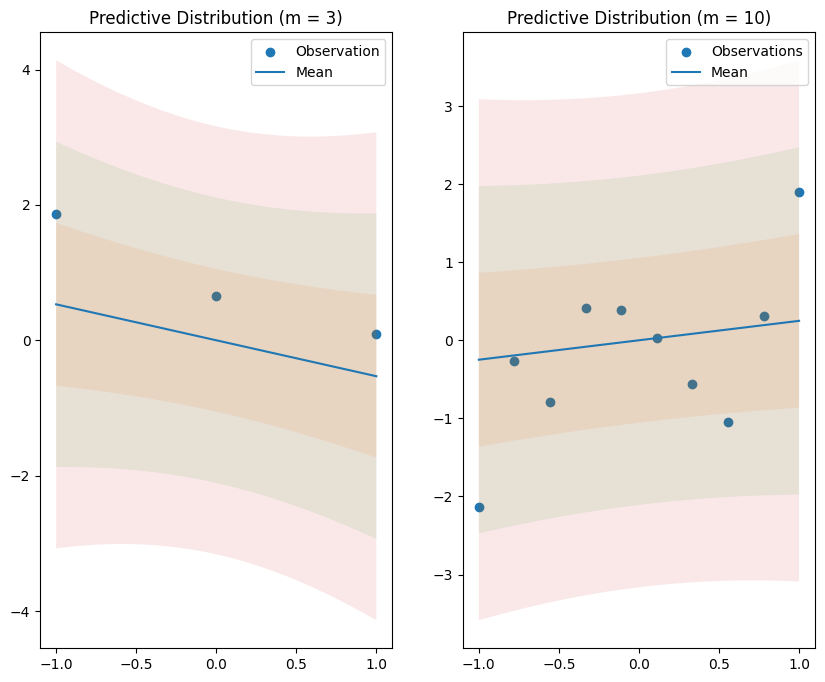

In [38]:

import numpy as np
import matplotlib.pyplot as plot

class BayesianRegression:

    def __init__(self, alpha = 1.0, beta = 1.0):
        self.alpha = alpha
        self.beta = beta
        self.w_mean = None
        self.w_precision = None
    
    #Fitting for the Bayesian linear regression 
    def fit(self, X, t):
        #Check if self.w_mean and self.w_precision are defined
        #If w_mean isn't defined its initialized to a zero vector with the same
        #total length as the # of features in X
        if self.w_mean is None:
            self.w_mean = np.zeros(X.shape[1])
        #If w_precision isn't defined its initialized to the prior precision
        #matrix for the weights. This results in a diagonal matrix where each
        #diagonal element is equal to self.alpha(scalar for certainty in prior weights).
        if self.w_precision is None:
            self.w_precision = self.alpha * np.eye(X.shape[1])
        
        #This is part of calculating the posterior distribution of the weights given by 
        #training the data.
        #self.w_precision is the prior precision of the weights. self.beta represents
        #how much noise is to be expected in observation. X is the input matrix.
        #X.T is a transpose of X and it is multiplied by its self to create a matrix
        #where each element represents the sum of the products of the features for the
        #training examples
        w_precision = self.w_precision + self.beta + X.T @ X

        #This is calculating the mean of the posterior distribution of the weights given by
        #training data.
        #SN = S0 + (beta * X.T * X)
        #mN = SN^-1(S0 * m0 + (beta * X.T * t))
        #w_precision is the SN in the the equation above. self.w_precision @ self.w_mean represents the 
        #(Beta * X.T * X). np.linalg.solve is a way to compute SN^-1 which gives us the posterior mean
        #mN
        w_mean = np.linalg.solve(w_precision, self.w_precision @ self.w_mean + self.beta * X.T @ t)
        
        self.w_mean = w_mean
        self.w_precision = w_precision
        #The covariance matrix is the inverse of the precision matrix. It allows the standard deviation
        #of the predictions to be calculated. 
        self.w_cov = np.linalg.inv(self.w_precision)
    
    def predict(self, X, return_std = False):
        #Compute the target values for the input data X using the mean of the weight
        y = X @ self.w_mean
        if return_std:
            #Computing the variance of predictive distribution for each input(X)
            #(1 / self.beta) represents the noise in the data
            #np.sum sums the contributions across all features for each input sample.
            #x @ self.w_cov * X computes these contributions
            y_var = 1 / self.beta + np.sum(X @ self.w_cov * X, axis = 1)
            #square roots the variance to find the standard devaiation
            y_std = np.sqrt(y_var)
            return y, y_std
        return y
    
#Create toy data for testing
def genToyData(func, sSize, std):
    #Generate an array of sSize(sample size) points evenly spaced between -1 and 1.
    #These will act as independent features for the regression
    x = np.linspace(-1, 1, sSize)
    #Observed values with added noise
    t = func(x) + np.random.normal(scale = std, size = x.shape)
    return x, t

#Needed to generate dataset with known pattern, and allows for a controlled testing
#enviroment
def func(x):
    return x

#Parameters for alpha and beta
a = 0.1
b = 0.9

#Generate the toy data for the case of small data(sparsity) eg m = 3
xTrain, yTrain = genToyData(func, sSize = 3, std = 1.0 / np.sqrt(b))
#Reshapes from a 1D array to a 2D array so the input can be 2D instead of 1D
xTrain = xTrain[:, None]
#creates a 2D array of 100 points evenly spaced between -1 and 1. It will be
#used as the input for making predictions from the regression model to plot 
#the predictive distribution
xTest = np.linspace(-1, 1, 100)[:, None]

#Passing the parameters alpha and beta to the Bayesian Regression Class
bModel = BayesianRegression(alpha = a, beta = b)
#Train the Bayesian model on by updating the prior distribution over the 
#model parameters based on the training data
bModel.fit(xTrain, yTrain)
#Make predeictions on new data(xTest) that are based on the model which is
#fitted to the toy data
#y represents the mean of the predictive distribution for each point in xTest
#yStd represents the standard deviation of the predictive distribution for 
#each point in xTest. The smaller the yStd the greater the confidence in the prediction
y, yStd = bModel.predict(xTest, return_std = True)

#plot results
plot.figure(figsize = (10, 8))
#This makes a subplot for each iteration of the loop, that is 1 by 3.

 #This allows for each dataset to be plotted on its own section.
plot.subplot(1, 2, 1)
plot.scatter(xTrain, yTrain, label = "Observation")
for i in range(1, 4):
    plot.fill_between(xTest.ravel(), y - i * yStd, y + i * yStd, alpha = 0.1)
plot.plot(xTest, y, label = "Mean")
plot.legend()
plot.title("Predictive Distribution (m = 3)")

#Generate toy data for when we have more data eg m = 10
xTrain, yTrain = genToyData(func, sSize = 10, std = 1.0 / np.sqrt(b))
#Same steps as before
xTrain = xTrain[:, None]

bModel.fit(xTrain, yTrain)

y, yStd = bModel.predict(xTest, return_std = True)

plot.subplot(1, 2, 2)
plot.scatter(xTrain, yTrain, label = "Observations")
for i in range(1, 4):
    plot.fill_between(xTest.ravel(), y - i * yStd, y + i * yStd, alpha = 0.1)
plot.plot(xTest, y, label = "Mean")
plot.legend()
plot.title("Predictive Distribution (m = 10)")

plot.show()

